### Introsuction

1.Partitioning a customer base into groups of individuals based on characteristics 

2.Allows a business to target different groups (high profit&low risk, …)

3.we can cross-reference the groups with their purchases

finding “clusters” in datasets, unsupervised

Cluster: a group of data points or objects in a dataset that are similar to other objects in the group, and dissimilar to datapoints in other clusters.

Different than classficiation:

1.no need to be labeled   

2.Prediction is not the goal


### Samples

Retail & Marketing: identify buying patterns / recommendation systems
 
Banking: Fraud detection / identify clusters (loyal, churn, …)

Insurance: Fraud detection / Risk  

Publication: auto-categorize / recommend

Medicine: characterize behaviour

Biology: group genes / cluster genetic markers (family ties)


### algorithms

Partitioned-based (K-means, K-Median, Fuzzy c-means, …): sphere like clusters / Medium or large data
    
Hierarchical (Agglomerative, Divisive): Trees of clusters / small size datasets
    
Density-based (DBSCAN): arbitrary shaped / good for special clusters or noisy data


### K Means 

Unsupervised, Divides data into K non-overlapping 

subset/cluster without any cluster internal structure

We need to understand the similarity and dissimilarity. 

Golad: minimize intra-cluster distances ( Dis(x1, x2) ) and maximize inter-cluster distances ( Dis(c1, c2) )
    
It is always good to Normalize!

different formulas: Euclidean, Cosine, Average distance, … so first understand the domain knowledge


### implement

decide the number of cluster (K)

init K “centroids” by:
    
   1.random points from the dataset

   2.random points


#### decide the number of cluster (K) init K “centroids” by: random points from the dataset ,random points


Review the algorithm

but how can we evaluate?

External: compare with truth
    
Internal: Average distance between datapoints within a cluster or the distance between clusters
    
Choosing K is difficult so we run with different Ks and check the accuracy (say mean mean distance inside a cluster) BUT decreasing K will always reduces this. So we do the elbow method


#### Objective

There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the

simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science 

applications, it is especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will

learn how to use k-Means for customer segmentation.

Some real-world applications of k-means: Customer segmentation, Understand what the visitors of a website are trying to 

accomplish, Pattern recognition, Machine learning ,Data compression

In this notebook we practice k-means clustering with 2 examples: k-means on a random generated dataset

Using k-means for customer segmentation

#### Import libraries


In [4]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

## k-Means on a randomly generated dataset

First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [5]:
np.random.seed(0)


Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.


#### Input

###### n_samples:
The total number of points equally divided among clusters.Value will be: 5000

###### centers:
The number of centers to generate, or the fixed center locations.Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]

###### cluster_std:

The standard deviation of the clusters.Value will be: 0.9

##### Output


###### X:
Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.

###### y:  Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [9]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X)
print(y)


[[-1.84404118 -0.28877401]
 [-3.60739432  0.08772576]
 [ 0.92991426  0.47851945]
 ...
 [-0.32120512  1.0736936 ]
 [ 5.17487478  4.69595765]
 [ 3.55049575  1.48955502]]
[1 1 3 ... 3 0 3]


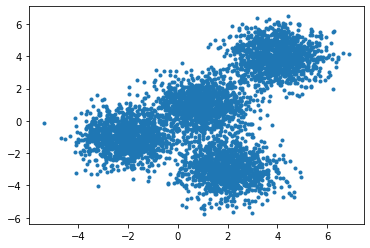

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.')


## Setting up K-Means


Now that we have our random data, let's set up our K-Means Clustering. The KMeans class has many parameters that can be used, but we will be using these three:



###### init:

Initialization method of the centroids.Value will be: "k-means++"

k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

##### n_clusters:
The number of clusters to form as well as the number of centroids to generate.Value will be: 4 (since we have 4 centers)

###### n_init:
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12

Initialize KMeans with these parameters, where the output parameter is called k_means.



In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)


Now let's fit the KMeans model with the feature matrix we created above, X .



In [11]:
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' .labels\_ attribute and save it as k_means_labels .



In [12]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 3, 1, 1])

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers\_ and save it as k_means_cluster_centers .



In [13]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95489462, -1.03564706],
       [ 3.99211079,  3.99540917],
       [ 2.00811148, -3.01440138],
       [ 1.01557176,  1.03442098]])

### Creating the Visual Plot


So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

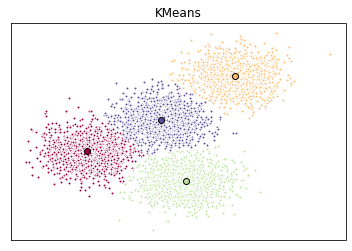

In [15]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Pre-processing</h2
As you can see, (For example Address) in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.




In [22]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [23]:
data=pd.read_csv('Logistic Regression/Regresion Logistic.csv')
data.head()

,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
0,1,4,19,2,5,1,0,1,0,1,2,2,1,1,2,2,2,1
1,1,1,22,1,5,2,2,1,2,1,2,2,2,6,2,2,2,0
2,1,4,24,2,5,1,1,1,0,1,2,2,1,2,1,2,2,0
3,1,2,25,2,5,1,2,1,2,1,2,4,1,6,1,2,2,1
4,1,1,44,2,5,2,8,1,0,1,2,4,2,9,2,2,2,0


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.



In [25]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.83916872, -1.15360705, -0.78118377, ...,  0.23304522,
         0.64407337,  1.18851683],
       [-1.62809077, -0.50232588, -1.2372727 , ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [ 0.83916872, -0.06813843, -0.78118377, ...,  0.23304522,
         0.64407337, -0.8413848 ],
       ...,
       [ 0.83916872, -0.50232588, -1.2372727 , ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [-0.80567094, -0.50232588,  1.04317196, ...,  0.23304522,
         0.64407337, -0.8413848 ],
       [-0.80567094, -1.37070078, -1.2372727 , ...,  0.23304522,
        -1.55261814, -0.8413848 ]])

### Modeling


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.

In [26]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 0 1 1]


### Insights
We assign the labels to each row in dataframe.



In [28]:
data["Clus_km"] = labels
data.head(5)


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy,Clus_km
0,1,4,19,2,5,1,0,1,0,1,2,2,1,1,2,2,2,1,1
1,1,1,22,1,5,2,2,1,2,1,2,2,2,6,2,2,2,0,1
2,1,4,24,2,5,1,1,1,0,1,2,2,1,2,1,2,2,0,1
3,1,2,25,2,5,1,2,1,2,1,2,4,1,6,1,2,2,1,1
4,1,1,44,2,5,2,8,1,0,1,2,4,2,9,2,2,2,0,2


We can easily check the centroid values by averaging the features in each cluster.



In [29]:
data.groupby('Clus_km').mean()


,JobNumber,MoEducate,MoAge,MoBloodGroup,CityNumber,TypeDelivery,NumberLiveBirth,NumberDeathNeonate,NumberAboration,EthnicNumber,familymarrige,Neonateweight,taneshlife,Paritypregnancy,Contraceptionbeforepregnancy,Smokingduringpregnancy,Smokingparents,Previousoutcomepregnanancy
Clus_km,,,,,,,,,,,,,,,,,,
0,1.160173,3.058874,23.809524,3.632035,12.570563,1.370563,1.643290,0.393074,0.206061,2.521212,1.710823,1.991342,1.845022,2.122078,1.497835,1.950649,1.849351,0.391342
1,1.158072,2.987470,23.650120,3.764337,6.193735,1.292048,1.598072,0.373012,0.138313,1.889157,1.687229,1.816867,1.857349,1.966747,1.581687,1.950361,1.628434,0.437590
2,1.192661,1.990826,42.293578,3.587156,7.972477,1.376147,3.550459,0.669725,0.422018,1.990826,1.743119,2.082569,1.981651,4.651376,1.330275,1.889908,1.688073,0.220183


Now, let's look at the distribution of customers based on their age and income:



<ipython-input-33-eeeddc6c17e0>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


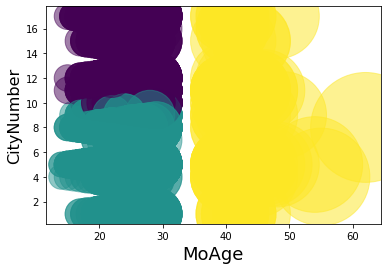

In [33]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('MoAge', fontsize=18)
plt.ylabel('CityNumber', fontsize=16)

plt.show()

<ipython-input-34-0052f1d21260>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


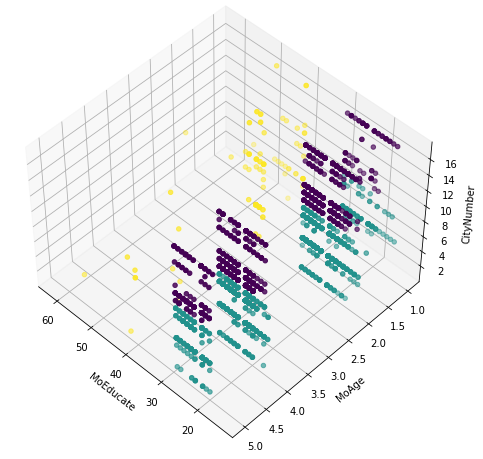

In [34]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('MoEducate')
ax.set_ylabel('MoAge')
ax.set_zlabel('CityNumber')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))